In [366]:
import addfips
import csv
import json
import matplotlib
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import pickle
import re
import vincent

In [367]:
%matplotlib inline

In [193]:
af = addfips.AddFIPS()
vincent.core.initialize_notebook()

In [2]:
state = {'ALABAMA': 'AL',
        'ALASKA': 'AK',
        'ARIZONA': 'AZ',
        'ARKANSAS': 'AR',
        'CALIFORNIA': 'CA',
        'COLORADO': 'CO',
        'CONNECTICUT': 'CT',
        'DELAWARE': 'DE',
        'FLORIDA': 'FL',
        'GEORGIA': 'GA',
        'HAWAII': 'HI',
        'IDAHO': 'ID',
        'ILLINOIS': 'IL',
        'INDIANA': 'IN',
        'IOWA': 'IA',
        'KANSAS': 'KS',
        'KENTUCKY': 'KY',
        'LOUISIANA': 'LA',
        'MAINE': 'ME',
        'MARYLAND': 'MD',
        'MASSACHUSETTS': 'MA',
        'MICHIGAN': 'MI',
        'MINNESOTA': 'MN',
        'MISSISSIPPI': 'MS',
        'MISSOURI': 'MO',
        'MONTANA': 'MT',
        'NEBRASKA': 'NE',
        'NEVADA': 'NV',
        'NEW HAMPSHIRE': 'NH',
        'NEW JERSEY': 'NJ',
        'NEW MEXICO': 'NM',
        'NEW YORK': 'NY',
        'NORTH CAROLINA': 'NC',
        'NORTH DAKOTA': 'ND',
        'OHIO': 'OH',
        'OKLAHOMA': 'OK',
        'OREGON': 'OR',
        'PENNSYLVANIA': 'PA',
        'RHODE ISLAND': 'RI',
        'SOUTH CAROLINA': 'SC',
        'SOUTH DAKOTA': 'SD',
        'TENNESSEE': 'TN',
        'TEXAS': 'TX',
        'UTAH': 'UT',
        'VERMONT': 'VT',
        'VIRGINIA': 'VA',
        'WASHINGTON': 'WA',
        'WEST VIRGINIA': 'WV',
        'WISCONSIN': 'WI',
        'WYOMING': 'WY',
        'DISTRICT OF COLUMBIA': 'DC'}

In [171]:
del df
df = pd.read_csv('data/gbp_county_wiki.csv')
df = df[np.isfinite(df['Rank'])]
df = df.reset_index()

Abbreviating name of the states

In [102]:
for i in range(len(df)):
    df['State'][i] = state[df['State'][i].upper()]

/home/kevin/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [172]:
# saving operation above
# pickle.dump(df['State'], open('states.p', 'wb'))
df['State'] = pickle.load(open('states.p', 'rb'))

In [242]:
sLength = len(df)
df['FIPS'] = pd.Series(np.zeros(sLength, dtype=np.int64), index=df.index)

In [187]:
df['County-equivalent'] = df['County-equivalent'].str.lower()

In [244]:
for i in range(len(df)):
    st_ = df['State'][i]
    county_ = df['County-equivalent'][i]
    if county_ == 'washington city':
        county_ = 'washington'
    elif county_ == 'dewitt' and st_ == 'IL':
        county_ = 'de witt'
    elif county_ == 'desoto' and st_ == 'LA':
        county_ = 'de soto'
    df['FIPS'][i] = int(af.get_county_fips(county_, state=st_))

/home/kevin/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [247]:
# saving operation above
# pickle.dump(df['FIPS'], open('fips.p', 'wb'))
df['FIPS'] = pickle.load(open('fips.p', 'rb'))

In [315]:
df

,index,Rank,County-equivalent,State,Per-capita-income,Median-household-income,Median-family-income,Population,Number-of-households,FIPS,total_GDP,GDP_50
0,0,1.0,new york county,NY,62498,69659,84627,1605272,736192,36061,2963916,0
1,1,2.0,arlington,VA,62018,103208,139244,214861,94454,51013,3231565,0
2,2,3.0,falls church city,VA,59088,120000,152857,12731,5020,51610,7942268,0
3,3,4.0,marin,CA,56791,90839,117357,254643,102912,6041,8951592,0
4,4,5.0,alexandria city,VA,54608,85706,107511,143684,65369,51510,9577356,0
5,5,6.0,pitkin,CO,51814,72745,93981,17173,7507,8097,9679498,0
6,6,7.0,los alamos,NM,51044,106686,124979,17979,7590,35028,11216626,0
7,7,8.0,fairfax county,VA,50532,110292,128596,1101071,389908,51059,12220132,0
8,8,9.0,hunterdon,NJ,50349,106143,125828,127047,46816,34019,12260352,0
9,9,10.0,borden,TX,50042,71607,76250,649,225,48033,12490919,0


In [318]:
sLength = len(df)
df['total_GDP'] = pd.Series(np.zeros(sLength, dtype=np.int64), index=df.index)
for i in range(len(df)):
    df['total_GDP'][i] = (df['Per-capita-income'][i] * df['Population'][i])

/home/kevin/.local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [254]:
print(min(df['total_GDP'].values), max(df['total_GDP'].values))

(2963916, 274534204269)


In [328]:
county_topo = r'us_counties.topo.json'
geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]

vis = vincent.Map(data=df, geo_data=geo_data, scale=1000,
                  projection='albersUsa', data_bind='total_GDP',
                  data_key='FIPS', map_key={'counties': 'properties.FIPS'})

#vis.marks[0].properties.enter.stroke_opacity = ValueRef(value=0.5)
#Change our domain for an even inteager
vis.legend(title='GDP')

vis.rebind(column='total_GDP', brew='RdPu')

vis.scales['color'].domain = [2963916, 274534204269]
vis.marks[0].properties.update.fill.value ='#ffffff'
vis.marks[0].properties.enter.stroke.value = '#ffffff'
vis.marks[0].properties.enter.stroke.value = '#ffffff'
vis.to_json('vega.json')
vis.display()

In [321]:
gdp = np.copy(df['total_GDP'].values)

In [322]:
gdp.sort()

In [331]:
half_ = sum(gdp)*.2
t_ = 0
for i in range(len(gdp)):
    if t_ < half_:
        t_ += gdp[i]
    else:
        break
print(i, gdp[i])

(2637, 3030692500)


In [319]:
sLength = len(df)
df['GDP_50'] = pd.Series(np.zeros(sLength, dtype=np.int64), index=df.index)
for i in range(len(df)):
    if df['total_GDP'][i] < 16006044615:
        df['GDP_50'][i] = 0
    else:
        df['GDP_50'][i] = 1

/home/kevin/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kevin/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [327]:
county_topo = r'us_counties.topo.json'
geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]

vis = vincent.Map(data=df, geo_data=geo_data, scale=1000,
                  projection='albersUsa', data_bind='GDP_50',
                  data_key='FIPS', map_key={'counties': 'properties.FIPS'})

#vis.marks[0].properties.enter.stroke_opacity = ValueRef(value=0.5)
#Change our domain for an even inteager
vis.legend(title='50% GDP')

vis.rebind(column='GDP_50', brew='RdPu')

vis.scales['color'].domain = [0, 1]
vis.marks[0].properties.update.fill.value ='#ffffff'
vis.marks[0].properties.enter.stroke.value = '#ffffff'
vis.marks[0].properties.enter.stroke.value = '#ffffff'
vis.to_json('vega.json')
vis.display()

In [332]:
sLength = len(df)
df['GDP_80'] = pd.Series(np.zeros(sLength, dtype=np.int64), index=df.index)
for i in range(len(df)):
    if df['total_GDP'][i] < 3030692500:
        df['GDP_80'][i] = 0
    else:
        df['GDP_80'][i] = 1

/home/kevin/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kevin/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [333]:
county_topo = r'us_counties.topo.json'
geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]

vis = vincent.Map(data=df, geo_data=geo_data, scale=1000,
                  projection='albersUsa', data_bind='GDP_80',
                  data_key='FIPS', map_key={'counties': 'properties.FIPS'})

#vis.marks[0].properties.enter.stroke_opacity = ValueRef(value=0.5)
#Change our domain for an even inteager
vis.legend(title='80% GDP')

vis.rebind(column='GDP_80', brew='RdPu')

vis.scales['color'].domain = [0, 1]
vis.marks[0].properties.update.fill.value ='#ffffff'
vis.marks[0].properties.enter.stroke.value = '#ffffff'
vis.marks[0].properties.enter.stroke.value = '#ffffff'
vis.to_json('vega.json')
vis.display()

In [355]:
df_election = pd.read_csv('data/US_County_Level_Presidential_Results_12-16.csv')

In [357]:
merged = df.merge(df_election,how='left', left_on='FIPS', right_on='FIPS')

In [358]:
merged

,index,Rank,County-equivalent,State,Per-capita-income,Median-household-income,Median-family-income,Population,Number-of-households,FIPS,...,county_name,total_votes_2012,votes_dem_2012,votes_gop_2012,county_fips,state_fips,per_dem_2012,per_gop_2012,diff_2012,per_point_diff_2012
0,0,1.0,new york county,NY,62498,69659,84627,1605272,736192,36061,...,New York County,496293.0,417861.0,72300.0,61.0,36.0,0.841964,0.145680,345561.0,0.696284
1,1,2.0,arlington,VA,62018,103208,139244,214861,94454,51013,...,Arlington County,117279.0,81178.0,34433.0,13.0,51.0,0.692178,0.293599,46745.0,0.398579
2,2,3.0,falls church city,VA,59088,120000,152857,12731,5020,51610,...,Falls Church city,7244.0,5006.0,2141.0,610.0,51.0,0.691055,0.295555,2865.0,0.395500
3,3,4.0,marin,CA,56791,90839,117357,254643,102912,6041,...,Marin County,99286.0,73450.0,23347.0,41.0,6.0,0.739782,0.235149,50103.0,0.504633
4,4,5.0,alexandria city,VA,54608,85706,107511,143684,65369,51510,...,Alexandria city,73470.0,52434.0,20205.0,510.0,51.0,0.713679,0.275010,32229.0,0.438669
5,5,6.0,pitkin,CO,51814,72745,93981,17173,7507,8097,...,Pitkin County,9779.0,6648.0,2941.0,97.0,8.0,0.679824,0.300746,3707.0,0.379078
6,6,7.0,los alamos,NM,51044,106686,124979,17979,7590,35028,...,Los Alamos County,10654.0,5191.0,4796.0,28.0,35.0,0.487235,0.450160,395.0,0.037075
7,7,8.0,fairfax county,VA,50532,110292,128596,1101071,389908,51059,...,Fairfax County,440174.0,260835.0,173786.0,59.0,51.0,0.592572,0.394812,87049.0,0.197760
8,8,9.0,hunterdon,NJ,50349,106143,125828,127047,46816,34019,...,Hunterdon County,62821.0,25148.0,36979.0,19.0,34.0,0.400312,0.588641,11831.0,-0.188329
9,9,10.0,borden,TX,50042,71607,76250,649,225,48033,...,Borden County,362.0,32.0,324.0,33.0,48.0,0.088398,0.895028,292.0,-0.806630


In [359]:
merged.columns.values

array(['index', 'Rank', 'County-equivalent', 'State', 'Per-capita-income',
       'Median-household-income', 'Median-family-income', 'Population',
       'Number-of-households', 'FIPS', 'total_GDP', 'GDP_50', 'GDP_90',
       'GDP_80', 'Unnamed: 0', 'combined_fips', 'votes_dem_2016',
       'votes_gop_2016', 'total_votes_2016', 'per_dem_2016',
       'per_gop_2016', 'diff_2016', 'per_point_diff_2016', 'state_abbr',
       'county_name', 'total_votes_2012', 'votes_dem_2012',
       'votes_gop_2012', 'county_fips', 'state_fips', 'per_dem_2012',
       'per_gop_2012', 'diff_2012', 'per_point_diff_2012'], dtype=object)

In [365]:
county_topo = r'us_counties.topo.json'
geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]

vis = vincent.Map(data=merged, geo_data=geo_data, scale=1000,
                  projection='albersUsa', data_bind='per_point_diff_2016',
                  data_key='FIPS', map_key={'counties': 'properties.FIPS'})

#Change our domain for an even inteager
vis.legend(title='2016')

vis.rebind(column='per_point_diff_2016', brew='RdBu')

vis.scales['color'].domain = [-1, 1]
vis.marks[0].properties.update.fill.value ='#ffffff'
vis.marks[0].properties.enter.stroke.value = '#ffffff'
vis.marks[0].properties.enter.stroke.value = '#ffffff'
vis.to_json('vega.json')
vis.display()

In [ ]:
county_topo = r'us_counties.topo.json'
geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]

vis = vincent.Map(data=merged, geo_data=geo_data, scale=1000,
                  projection='albersUsa', data_bind='per_point_diff_2012',
                  data_key='FIPS', map_key={'counties': 'properties.FIPS'})

#Change our domain for an even inteager
vis.legend(title='2012')

vis.rebind(column='per_point_diff_2012', brew='RdBu')

vis.scales['color'].domain = [-1, 1]
vis.marks[0].properties.update.fill.value ='#ffffff'
vis.marks[0].properties.enter.stroke.value = '#ffffff'
vis.marks[0].properties.enter.stroke.value = '#ffffff'
vis.to_json('vega.json')
vis.display()

[]

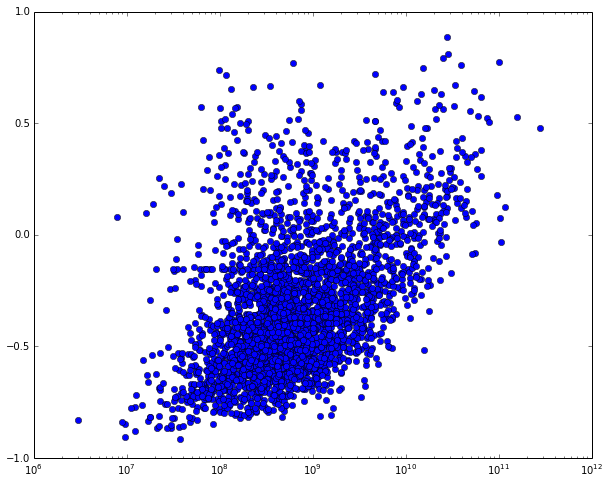

In [370]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.plot(merged['total_GDP'], merged['per_point_diff_2016'], 
         'o')

plt.semilogx()